In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import * 

from numpy import *

# Binary System of Sirius

In [2]:
# Units 
s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter



<Unit('meter')>

Given the period of 50 years and the radius, we can calculate the velocity.

In [93]:
r_0 = 2.992e12 * m
T_0 = 50 * 365 * 24 * 60*60 * s
init = State(xA = -r_0 *1/3,
             yA = 0 *m,
             vxA = 0 *m/s,
             vyA = 2*pi*r_0/(3*T_0),
             xB = r_0*2/3,
             yB = 0 * m,
             vxB = 0 *m/s,
             vyB = -4*pi*r_0 /(3*T_0)
            )

,values
xA,-997333333333.3334 meter
yA,0 meter
vxA,0.0 meter / second
vyA,3974.1439284376206 meter / second
xB,1994666666666.6667 meter
yB,0 meter
vxB,0.0 meter / second
vyB,-7948.287856875241 meter / second


The mass of Sirius A is 2.1 times the mass of the sun, rounded to 2.
The mass of Sirius B is 0.98 times the mass of the sun, rounded to 1.
Therefore the center of mass is at 1/3 of the distance from Sirius A to B.

In [94]:
m_sun = 1.989*10e30*kg
r_sun = 6.955*10e8 *m
r_0 = 2.992e12 * m
system = System(init = init,
                 G = 6.674e-11 * N / kg**2 * m**2,
                 mA = 2*m_sun, 
                 mB = m_sun,
                 #rA = 1.71 * r_sun,
                 #rB= 0.008*r_sun,
                 t_0 = 0 *s,
                 t_end = T_0)


,values
init,xA -997333333333.3334 meter yA ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
mA,3.9780000000000003e+31 kilogram
mB,1.9890000000000001e+31 kilogram
t_0,0 second
t_end,1576800000 second


In [72]:
def universal_gravity(state, system):    
    """"
    Calculating gravitational force between Sirius A and Sirius B
    Taking the center of mass as origin
    xA, yA: posistion of Sirius A 
    xB, yB: position of Sirius B
    vxA, vyA: velocity of Sirius A
    vxB, vyB: velocity of Sirius B
    """
    xA, yA, vxA, vyA, xB, yB, vxB, vyB = state
    unpack(system)
    posA = Vector (xA, yA)
    posB = Vector (xB, yB)
    
    ra = posA.mag
    rb = posB.mag
    directionA = -posA.hat()
    directionB = -posB.hat()
    value = G * mA *mB / (ra +rb)**2
    forceA = value * directionA
    forceB = value * directionB
    return forceA, forceB
    

In [61]:
universal_gravity(init, system)

(<Quantity([ 5.89878525e+27 -0.00000000e+00], 'newton')>,
 <Quantity([-5.89878525e+27 -0.00000000e+00], 'newton')>)

In [83]:
def slope_func(state, t, system):
    xA, yA, vxA, vyA, xB, yB, vxB, vyB= state
    unpack(system)
    
    forceA,forceB = universal_gravity(state, system)
    accA = forceA / mA
    accB = forceB / mB
    accAx = accA[0]
    accAy = accA[1]
    accBx = accB[0]
    accBy = accB[1]
    
    
    return vxA, vyA, accAx ,accAy, vxB, vyB, accBx, accBy
    

In [84]:
slope_func (init, 0, system)

(<Quantity(0.0, 'meter / second')>,
 <Quantity(3974.1439284376206, 'meter / second')>,
 <Quantity(0.00014828519992707826, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>,
 <Quantity(0.0, 'meter / second')>,
 <Quantity(-7948.287856875241, 'meter / second')>,
 <Quantity(-0.00029657039985415653, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [85]:
results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,1856
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [86]:
t_final = get_last_label(results) * s

<Quantity(1576800000.0, 'second')>

In [87]:
t_final.to(UNITS.years)

<Quantity(49.9668440856426, 'year')>

In [88]:
ts = linspace(t_0, t_final, 500)
results, details = run_ode_solver(system, slope_func, t_eval=ts)
results

,xA,yA,vxA,vyA,xB,yB,vxB,vyB
0.000000e+00,-9.973333e+11,0.000000e+00,0.000000,3974.143928,1.994667e+12,0.000000e+00,0.000000,-7948.287857
3.159920e+06,-9.965929e+11,1.255486e+10,468.765861,3971.190731,1.993186e+12,-2.510972e+10,-937.531722,-7942.381462
6.319840e+06,-9.943696e+11,2.509091e+10,938.732811,3962.290429,1.988739e+12,-5.018182e+10,-1877.465621,-7924.580859
9.479760e+06,-9.906580e+11,3.758956e+10,1411.051770,3947.363588,1.981316e+12,-7.517912e+10,-2822.103541,-7894.727176
1.263968e+07,-9.854489e+11,5.003157e+10,1886.921204,3926.260585,1.970898e+12,-1.000631e+11,-3773.842408,-7852.521170
1.579960e+07,-9.787286e+11,6.239680e+10,2367.624511,3898.747937,1.957457e+12,-1.247936e+11,-4735.249021,-7797.495875
1.895952e+07,-9.704794e+11,7.466423e+10,2854.530024,3864.508301,1.940959e+12,-1.493285e+11,-5709.060048,-7729.016602
2.211944e+07,-9.606796e+11,8.681196e+10,3349.091013,3823.140470,1.921359e+12,-1.736239e+11,-6698.182026,-7646.280941
2.527936e+07,-9.493028e+11,9.881698e+10,3852.862299,3774.143578,1.898606e+12,-1.976340e+11,-7705.724598,-7548.287157
2.843928e+07,-9.362867e+11,1.106311e+11,4369.453374,3715.051353,1.872573e+12,-2.212623e+11,-8738.906749,-7430.102705


In [89]:
xa = results.xA;
ya = results.yA;
xb = results.xB;
yb = results.yB;

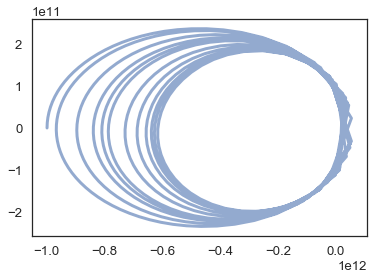

In [90]:
plot (xa, ya)

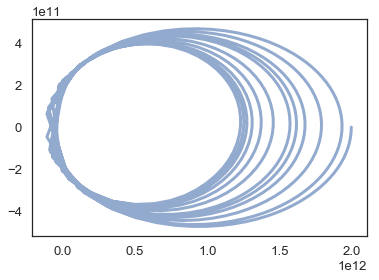

In [91]:
plot (xb,yb)

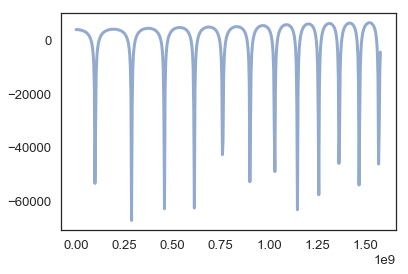

In [92]:
#plot(results.index, results.vxA)
plot(results.index, results.vyA)
